In [2]:
# All Imports
import sys 
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import collections
#from sklearn.neighbors import NearestNeighbors
#from gensim.test.utils import common_texts
import pickle

from gensim.models.doc2vec import Doc2Vec, TaggedDocument,KeyedVectors 
from gensim.test.utils import get_tmpfile

In [14]:
test_documents_json = pickle.load( open( "counted_bows_test", "rb" ) ) #test_documents
print(len(test_documents_json))
print(test_documents_json[0][1])

10969
['2806585', 14]


In [12]:
train_documents_json = pickle.load( open( "counted_bows", "rb" ) ) #train_documents
print(len(train_documents_json))

123984


In [15]:
train_documents = [TaggedDocument(i[0],i[1]) for i in train_documents_json]
test_documents = [TaggedDocument(i[0],i[1]) for i in test_documents_json]
print(len(train_documents))

123984


In [16]:
print(train_documents[0])

TaggedDocument(['stop', 'want', 'truth', 'come', 'around', 'truth', 'whi', 'truth', 'well', 'roll', 'roll', 'truth', 'tell', 'truth', 'love', 'day', 'around', 'tell', 'stop', 'last', 'truth', 'tell', 'up', 'truth', 'if', 'start', 'tell', 'tell', 'tell', 'truth', 'lie', 'truth', 'about', 'come', 'everi', 'want', 'tell', 'truth', 'well', 'would', 'now', 'everi', 'if', 'truth', 'tell', 'tell', 'hold', 'tell', 'good', 'tell', 'feel', 'were', 'oh', 'babi', 'tell', 'feel', 'can', 'truth', 'tell', 'goin', 'tell', 'night', 'fall', 'tight', 'up', 'tell', 'truth', 'can', 'tell', 'girl', 'tell', 'would', 'can', 'truth', 'lie', 'make', 'tell', 'day', 'truth', 'sure', 'tell', 'truth', 'tell', 'would', 'hey', 'tell', 'stop', 'tell', 'truth', 'made', 'babi', 'tell', 'babi', 'day', 'thought', 'truth', 'hey', 'man', 'sure', 'whi', 'truth', 'life', 'well', 'could', 'littl', 'bridg', 'done', 'everi', 'if', 'good', 'truth', 'make', 'stop', 'love', 'thought', 'truth', 'want', 'want', 'tell', 'could', 'tell

In [17]:
#model_dbow = Doc2Vec(vector_size=40, min_count=2, epochs=30, dm=0)
#model_pvdm = Doc2Vec(train_documents, vector_size=10, min_count=2, epochs=5)
model_pvdm = Doc2Vec(documents=train_documents, vector_size=5, epochs=40, window=5, min_count=2, workers=6)
#model_pvdm.build_vocab(train_documents)
#model_dbow.build_vocab(train_documents)

In [6]:
model_dbow.train(train_documents, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)

In [20]:
#model_pvdm.save("counted.model")
model_pvdm.save_word2vec_format("counted1.model")
#model_dbow.save("model_dbow.model")

In [6]:
model_pvdm.train(train_documents, total_examples=model_pvdm.corpus_count, epochs=model_pvdm.epochs)

In [7]:
#model = Doc2Vec.load("doc2vec.model")
model_dbow = Doc2Vec.load("model_dbow.model")

ValueError: Cannot load file containing pickled data when allow_pickle=False

<ipython-input-12-f97e950d03b9>:7: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis="x", nbins=4)


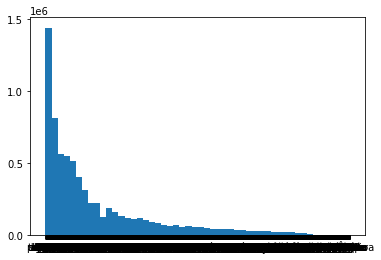

In [12]:
words = [i[0] for i in train_documents_json]
flatten_words = [item for sublist in words for item in sublist]
#counter = collections.Counter(flatten_words)
#print(counter)

plt.hist(flatten_words, bins = 50)
plt.locator_params(axis="x", nbins=4)
plt.locator_params(axis="y", nbins=4)
plt.show()

In [21]:
inferred_vectors = []

for doc_id in range(len(test_documents)): #len(test_documents)
    inferred_vector = model_dbow.infer_vector(test_documents[doc_id].words)
    inferred_vectors.append([inferred_vector, test_documents[doc_id].tags])
    

In [9]:
with open("inferred_vectors_dbow","wb") as inf_json:
    pickle.dump(inferred_vectors,inf_json)
inf_json.close()

In [10]:
#genres = [i['primary_genres']['music_genre_list'][0]['music_genre']['music_genre_parent_id'] for i in tracks]
genres = [i[1][1] for i in inferred_vectors]
unique_colors = list(set(genres))
print(len(unique_colors))
colors = [unique_colors.index(i) for i in genres]


93


In [24]:
X = np.array([i[0] for i in inferred_vectors])
X_embedded = TSNE(n_components=2, perplexity=10).fit_transform(X)
X_embedded.shape

with open("t_sne_vectors_dbow","wb") as tsne_json:
    pickle.dump(X_embedded,tsne_json)
tsne_json.close()

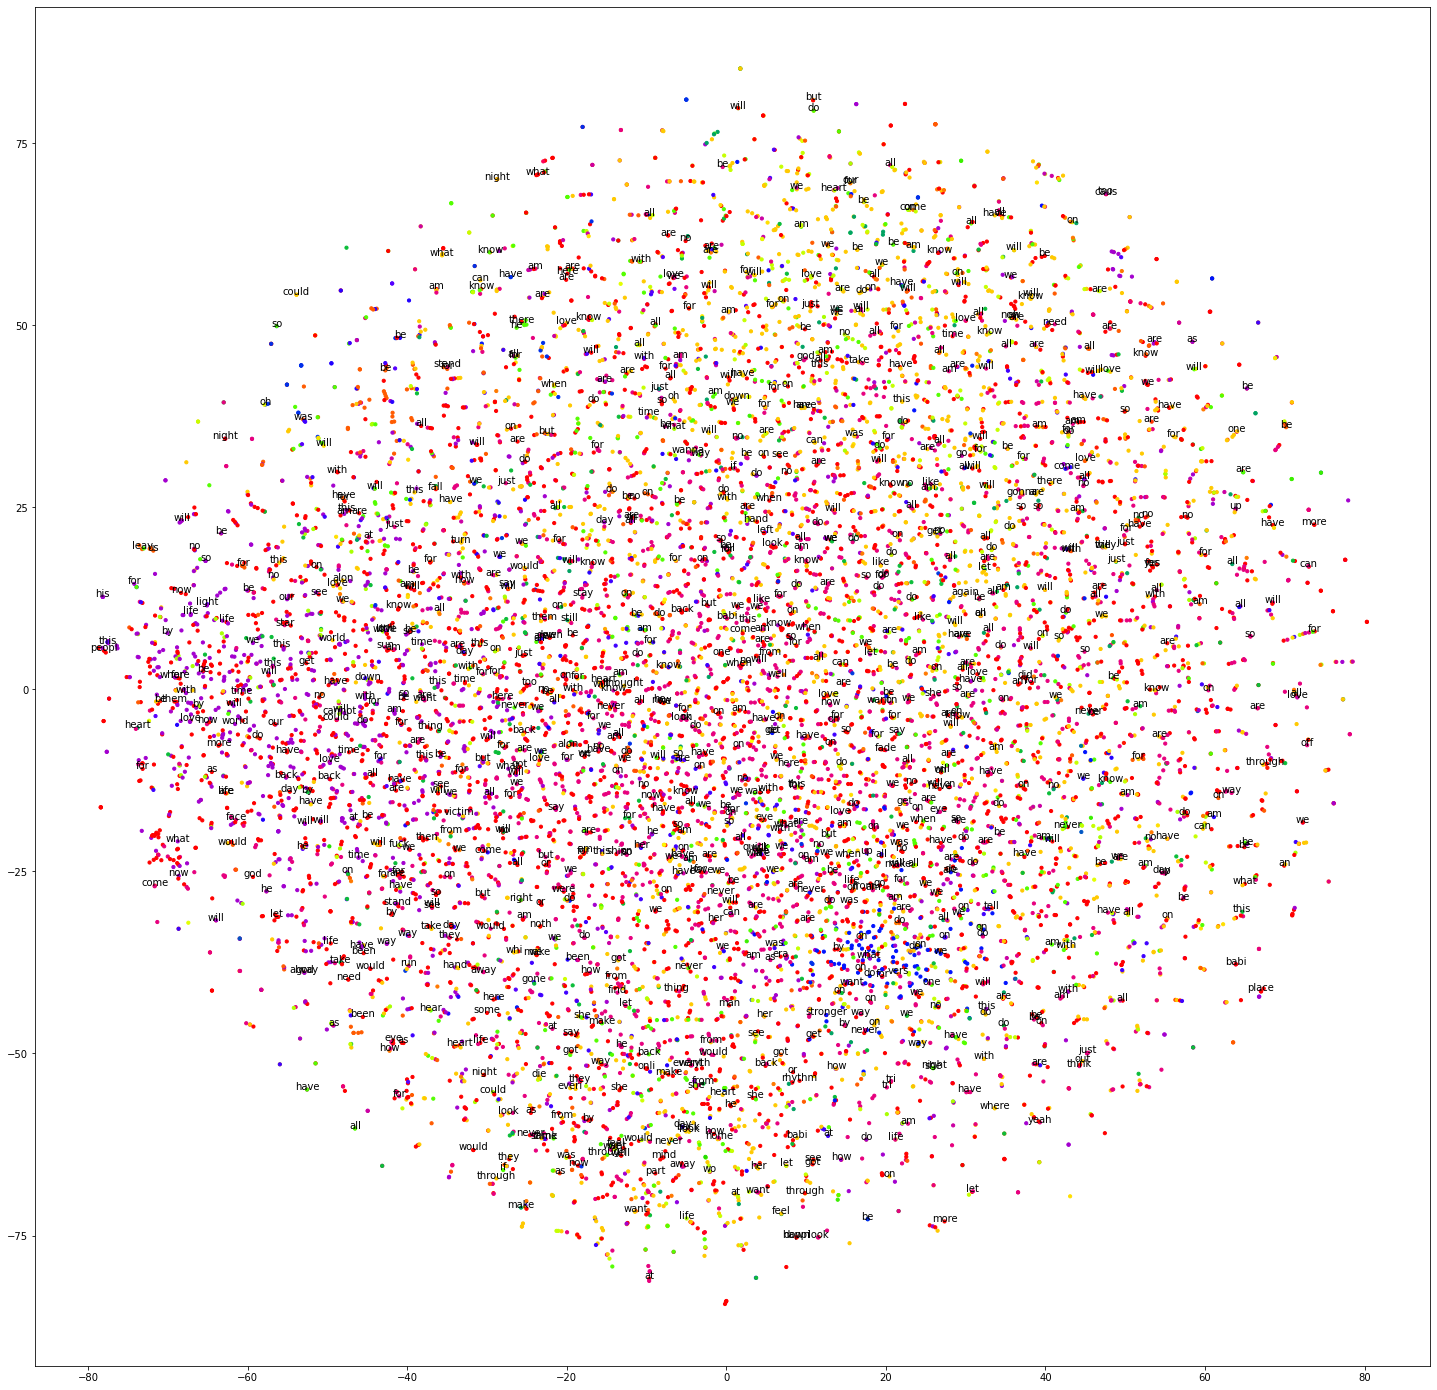

In [25]:
plt.figure(figsize=(25, 25))

plt.scatter([i[0] for i in X_embedded],[i[1] for i in X_embedded],c=colors,cmap='prism', s=10)

for x in range(1000):
    #label = test_documents[x][0][0]
    if len(test_documents[x][0]) > 9:
        label = test_documents[x][0][9]
    

    plt.annotate(label, # this is the text
             (X_embedded[x][0],X_embedded[x][1]), # this is the point to label
             textcoords="offset points", # how to position the text
             xytext=(0,0), # distance from text to points (x,y)
             ha='center')

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [' '.join(x[0]) for x in new_train_documents]
vectorizer = TfidfVectorizer()
tfidf_x = vectorizer.fit_transform(corpus)
all_words = vectorizer.get_feature_names()

4033


In [11]:
stops = vectorizer.get_stop_words()
print(len(all_words), stops)

4033 None


In [41]:
# REMOVING OTHER LANGUAGES
new_all_docs = []
all_docs = test_documents_json
print(len(all_docs))
foreign_words = set(['de', 'que', 'un', 'de', 'la', 'ich', 'ca', 'te','en', 'se', 'e', 'du', 'y', 'tu', 'eu', 
                     'ja', 'je', 'di', 'le', 'ne', 'ha', 'el', 'da', 'ein', 'si', 'und', 'jag', 'na', 'et',
                     'det', 'lo', 'der', 'por', 'mia', 'il', 'jai','uit', 'joka', 'vaikka', 'että', 'yang', 'seul', 
                     'mujer', 'blanco', 'kaikki', 'espera', 'kuin', 'cuando', 'qui', 'vai', 'les', 'viel', 'niin', 
                     'dein', 'esta', 'mentira', 'ainda','aber', 'pelo', 'zu', 'zum', 'zwei', 'är', 'él', 'és', 
                     'être', 'über', 'zijn', 'tá', 'tú', 'são', 'sä', 'så', 'sé', 'się', 'sie', 'mitä', 
                     'komm', 'kommen', 'kommt', 'ihr', 'här', 'hör', 'hier', 'går', 'hab', 'habe', 'haben',
                     'glaub', 'från', 'deinem', 'deja', 'del', 'dass', 'até', 'besoin', 'buen', 'buena', 'bueno',
                     'ces', 'cest', 'cett', 'dalla', 'deux', 'donâ', 'ell', 'ella', 'ello', 'fait', 'feliz',
                     'macht', 'meg', 'mehr', 'mein', 'meiner', 'mio', 'mir', 'nie', 'niemal', 'nicht', 'perdido',
                     'pueblo', 'puerta', 'sono', 'tiempo', 'tien', 'tierra', 'tuo', 'schön', 'zeit', 'weiter', 'très',
                     'tutti', 'soledad', 'soleil', 'youâ', 'seh', 'sehr', 'sein', 'donâ', 'mag', 'lui','domani', 'og', 
                     'ut', 'va', 'youâ', 'vien', 'vieux', 'jaim', 'jamai', 'kai', 'kan', 'kann', 'puedo','luego', 'una',
                     'você'])
english_words = ['love', 'up', 'now', 'when', 'time', 'like', 
                 'by', 'was', 'come', 'can', 'there', 'out', 'go', 'they', 'one', 
                 'hit', 'down', 'feel', 'till', 'never', 'see', 'she', 'her', 
                 'as', 'get', 'if', 'from', 'life', 'sun', 'he', 'head', 'heart', 'die',
                 'away', 'got', 'want', 'say', 'way', 'where', 'make', 'let', 'how', 'dream', 'fall', 'would', 
                 'need', 'think', 'back', 'under', 'our', 'eye', 'yo', 'man', 'caus', 'look', 'who', 'or', 
                 'far', 'world', 'here', 'still', 'day', 'night', 'too', 'mind', 'find', 'alway', 'through',
                 'take', 'guitar', 'men', 'girl', 'turn', 'onli', 'well', 'hear', 'us', 'minut', 'pass', 
                 'thing', 'give', 'shine', 'boy', 'off', 'friend', 'around', 'tell', 'lost', 'dead', 'cold', 'cri',
                 'forev', 'sky', 'lie', 'has', 'been', 'right', 'his', 'had', 'about', 'first', 'could', 'again']
stop_words = ['i', 'the', 'you', 'and', 'to', 'a','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '2x', '3x',
             '000', '16', '24', '30', '40', '4x', '50','x2', 'x3', 'x4', '100', '12', '13', '15', '20', 'chorus']
for song in all_docs:
    if not bool(set(song[0]) & foreign_words) and len(song[0]) > 3:
        newsong = [list(filter(lambda x: not x in stop_words, song[0])), song[1]]
        for w in range(len(newsong[0])):
            if newsong[0][w] in ['ah', 'aah', 'aaah','ahh', 'ahhh']:
                newsong[0][w] = 'ah'
            if newsong[0][w] in ['oh', 'ooh', 'oooh','ohh', 'ohhh', 'ohhhh', 'ohoh', 'o', 'oo']:
                newsong[0][w] = 'oh'
            if newsong[0][w] in ['uh', 'uuh', 'uuuh','uhh', 'uhhuh']:
                newsong[0][w] = 'uh'
        new_all_docs.append(newsong)

print(len(new_all_docs))
print(new_all_docs[0])
with open("test_documents","wb") as inf_json:
    pickle.dump(new_all_docs,inf_json)

11020
10969
[['love', 'can', 'one', 'if', 'got', 'want', 'let', 'make', 'would', 'at', 'babi', 'yeah', 'here', 'how', 'need', 'look', 'caus', 'been', 'think', 'who', 'tri', 'well', 'still', 'about', 'hand', 'then', 'said', 'wait', 'hold', 'them', 'hear', 'head', 'hey', 'word', 'place', 'friend', 'should', 'put', 'true', 'rememb', 'mayb', 'help', 'understand', 'truth', 'took', 'voic', 'promis', 'differ', 'faith', 'sorri', 'father', 'count', 'realiz', 'alreadi', 'five', 'lucki', 'woo', 'honest', 'wow', 'obvious', 'grate'], ['2806585', 14]]


In [5]:

import random

counted_docs = pickle.load( open( "tfidf_all_songs", "rb" ) )
new_train_documents = []
for track in train_documents_json:
    m_id = track[1][0]
    word_counts = counted_docs[m_id]
    new_bow = []
    for w in word_counts.keys():
        new_bow += [w for i in range(word_counts[w])]
    random.shuffle(new_bow)
    new_train_documents.append([new_bow, track[1]])
        
print(new_train_documents[5])  

[['want', 'fear', 'live', 'life', 'fear', 'life', 'who', 'fear', 'want', 'by', 'want', 'life', 'life', 'our', 'love', 'step', 'live', 'live', 'life', 'step', 'aim', 'fear', 'futur', 'fear', 'flame', 'who', 'fear', 'tell', 'give', 'pleas', 'fear', 'keep', 'fear', 'lie', 'life', 'give', 'claim', 'give', 'life', 'inner', 'fear', 'see', 'fear', 'life', 'who', 'fear', 'eye', 'life', 'life', 'fear', 'life', 'open', 'fear'], ['4058740']]


In [106]:
import random
print(len(new_all_docs))


random.shuffle(new_all_docs)
train = new_all_docs[:100000]
test = new_all_docs[100000:]
print(len(train))
print(len(test))
with open("train_documents","wb") as tr:
    pickle.dump(train,tr)
tr.close()
with open("test_documents","wb") as te:
    pickle.dump(test,te)
te.close()

124530
100000
24530


In [61]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)



array([16, 12,  1, ..., 11,  9,  9])

In [54]:
"""
with open('words_dump.json','r') as file2:
    words_dump = json.load(file2) 

word_index = {v:k for v,k in zip(words_dump, range(len(words_dump)))}

word_index['love']

with open('tracks_train.json','r') as file:
    tracks_train = json.load(file) 
with open('tracks_test.json','r') as file1:
    tracks_test = json.load(file1) 
    
with open('words_dump.json','r') as file2:
    words_dump = json.load(file2) 
"""
counted = {}
    
for i in train_documents:
    m_id = i[1][0]
    filtered_words = i[0]
    item = {}
    if m_id in tracks_train:
        item = tracks_train[m_id]     
    elif m_id in tracks_test:
        item = tracks_test[m_id]
    new_counts = {}  
    for word in filtered_words:
        index = word_index[word] + 1
        if index == 46:
            oohs = [46, 312, 1002, 3320, 1167, 183, 1417, 1752, 2199, 2960, 3934,4037]
            new_counts[word] = 0
            for oh in oohs:
                if str(oh) in item['words']:
                    new_counts[word] += int(item['words'][str(oh)])
        elif index == 362:
            ahs = [362, 1586, 2981, 3385, 2196, 4290]
            new_counts[word] = 0
            for ah in ahs:
                if str(ah) in item['words']:
                    new_counts[word] += int(item['words'][str(ah)])
        elif index == 658:
            uhs = [657, 3335, 3931]
            new_counts[word] = 0
            for uh in uhs:
                if str(uh) in item['words']:
                    new_counts[word] += int(item['words'][str(uh)])
        else:
            new_counts[word] = int(item['words'][str(index)])
    counted[m_id] = new_counts
    

print(counted[m_id])
#with open("tfidf_all_songs","wb") as counted_json:
#    pickle.dump(counted,counted_json)
#counted_json.close()

{'now': 1, 'time': 1, 'can': 1, 'come': 2, 'there': 1, 'go': 2, 'oh': 4, 'one': 1, 'they': 1, 'out': 1, 'down': 2, 'see': 2, 'if': 1, 'let': 2, 'say': 1, 'as': 2, 'at': 1, 'away': 3, 'by': 2, 'how': 2, 'thing': 2, 'world': 6, 'tell': 1, 'through': 2, 'or': 3, 'us': 1, 'around': 2, 'good': 1, 'about': 1, 'into': 1, 'wait': 2, 'home': 1, 'them': 1, 'has': 1, 'chang': 1, 'left': 2, 'play': 1, 'sing': 4, 'lost': 1, 'other': 1, 'sin': 3, 'those': 1, 'fli': 1, 'wonder': 1, 'hide': 1, 'everybodi': 1, 'happi': 1, 'set': 1, 'sea': 1, 'matter': 1, 'sit': 1, 'land': 1, 'along': 1, 'everyon': 1, 'car': 3, 'children': 1, 'dear': 1, 'search': 1, 'ho': 24, 'nowher': 2, 'drown': 6, 'strang': 2, 'wash': 3, 'sand': 1, 'radio': 1, 'tv': 1, 'beneath': 1, 'ice': 7, 'golden': 1, 'float': 1, 'below': 2, 'rush': 3, 'tide': 3, 'swim': 3, 'brown': 2, 'park': 1, 'melt': 7, 'highway': 1, 'fish': 2, 'toy': 1, 'wipe': 2, 'whether': 3, 'map': 1, 'meal': 1, 'cap': 7, 'glide': 2, 'disagre': 1}


In [101]:
new_test_docs = []
print(len(test_documents_json))
for doc in test_documents_json:
    if len(doc[0]) > 3:
        new_test_docs.append(doc)
print(len(new_test_docs))
with open("test_documents","wb") as test_json:
    pickle.dump(new_test_docs,test_json)
test_json.close()

11044
11024


In [102]:
new_train_docs = []
print(len(train_documents_json))
for doc in train_documents_json:
    if len(doc[0]) > 3:
        new_train_docs.append(doc)
print(len(new_train_docs))
with open("train_documents","wb") as test_json:
    pickle.dump(new_train_docs,test_json)
test_json.close()

113530
113530


In [16]:
def most_similar_track(words):
    inferred_vector = model.infer_vector(words)
    sims = model.docvecs.most_similar([inferred_vector])
    for i in train_documents_json:
        if i[1][0] in [x[0] for x in sims[:3]]:
            print(' '.join(i[0]))
            print('\n')
    print(' '.join(set(words)))
    print('\n')


In [25]:
all_documents = train_documents_json + test_documents_json
all_documents_strings = [" ".join(i[0]) for i in all_documents]
setOfElems = set()
test_duplicates = []
train_duplicates = []
for i in range(len(all_documents_strings)):
    if all_documents_strings[i] in setOfElems:
        if len(all_documents[i][1]) == 2:
            test_duplicates.append(all_documents[i][1])
        else:
            train_duplicates.append(all_documents[i][1])  
    else:
        setOfElems.add(all_documents_strings[i])         
print(len(test_duplicates) , len(train_duplicates))

424 4932


In [31]:
duplicates = test_duplicates + train_duplicates
train_documents = [i for i in train_documents_json if i[1] not in duplicates]
test_documents = [i for i in test_documents_json if i[1] not in duplicates]



189572 18278


In [32]:

print(train_documents[0])

with open("train_documents","wb") as tsne_json:
    pickle.dump(train_documents,tsne_json)
tsne_json.close()

with open("test_documents","wb") as test_json:
    pickle.dump(test_documents,test_json)
test_json.close()

[['love', 'when', 'time', 'can', 'there', 'up', 'heart', 'where', 'tell', 'live', 'wo', 'then', 'light', 'call', 'home', 'hear', 'place', 'much', 'left', 'new', 'than', 'chorus', 'own', 'mine', 'tear', 'use', 'rememb', 'kiss', 'open', 'mayb', 'broken', 'fade', 'nobodi', 'memori', 'hous', 'somebodi', 'meet', 'apart', 'sinc', 'afraid', 'window', 'piec', 'drown', 'everyday', 'wine', 'dove', 'sweeter'], ['1849722']]


In [36]:
test = 6374
most_similar_track(test_documents[test].words) 

come oh one they was from he would babi heart night our world his long light had has their god made chorus sky song own far sin sleep rememb star cold shine heaven till deep son knew fill lay abov peac jesus repeat felt bright dear holi worth travel innoc mari gift appear birth await savior error pine messiah


time there la one out see feel way take ca back here need look eye more die live long turn hand into had soul lost peopl without move dark other myself close cold side black death may seen fool angel rise reach tomorrow rest power anymor near within straight & evil devil sorrow demon guid rush surrend eas foot mend strand finn


go oh get never way take ca life her here again give us good littl into face their much chang these left burn watch pain danc myself fight doe year fli black hate till music reach laugh king afraid parti piec christma wing bird rose dawn shot safe silent rip colour yellow hunter vampir elev graveyard


a other last care we right lay say fall world good w

<ipython-input-16-1f0b5b4ae243>:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  sims = model.docvecs.most_similar([inferred_vector])


In [8]:
with open('word_counts.json','r') as xc:
    word_count_dict= json.load(xc)

In [34]:
#set([i['primary_genres']['music_genre_list'][0]['music_genre']['music_genre_parent_id'] for i in tracks])

counter = collections.Counter(genres)
print(counter)



Counter({21: 4784, 14: 3696, 20: 2971, 1153: 1219, 6: 681, 18: 486, 22: 471, 15: 462, 7: 379, 10: 319, 34: 246, 12: 237, 11: 232, 1117: 228, 2: 172, 17: 160, 19: 149, 50000064: 135, 1121: 121, 24: 106, 1149: 95, 1004: 92, 1006: 82, 1152: 79, 23: 74, 8: 68, 1144: 59, 1225: 57, 1094: 50, 1035: 50, 1124: 48, 1155: 41, 1101: 37, 1133: 37, 1119: 36, 16: 33, 1073: 28, 1002: 24, 1072: 21, 1122: 21, 4: 19, 3: 18, 1160: 15, 5: 15, 1123: 14, 1156: 14, 1120: 14, 1037: 13, 13: 13, 50000066: 12, 100007: 12, 1289: 12, 1205: 11, 1136: 10, 1076: 10, 1226: 9, 1062: 8, 1065: 8, 1067: 8, 1098: 7, 1131: 7, 1118: 7, 1100: 7, 1175: 6, 1001: 6, 1005: 6, 1048: 5, 1259: 5, 1080: 5, 1042: 5, 1143: 4, 1227: 4, 1295: 4, 1134: 4, 1146: 4, 1116: 3, 1068: 3, 1097: 3, 1063: 3, 1135: 3, 1051: 3, 27: 3, 1132: 3, 1150: 3, 1058: 3, 1151: 3, 1034: 2, 1176: 2, 1194: 2, 1127: 2, 1192: 2, 25: 2, 1013: 2, 1078: 2, 1203: 2, 1074: 2, 1061: 2, 1064: 2, 1139: 2, 1070: 2, 1096: 2, 1220: 2, 100020: 1, 1686: 1, 100019: 1, 1114: 1, 2

In [32]:
#new_test_docs = []

for j in range(len(train_documents)):
    for i in range(len(test_documents1)):
        if test_documents1[i][1][0] == train_documents[j][1][0]:
            new_test_docs.append([train_documents[j][0],test_documents1[i][1]])
            break
    if len(new_test_docs) >= 18702:
        break
print(len(new_test_docs),len(test_documents1),len(test_documents))

18702 18702 27143


In [26]:
#with open('newInfos.json','r') as f:
#    tracks_genres = json.load(f)

In [38]:
with open('test_documents.json','r') as file:
    test_tracks = json.load(file) 

In [42]:
new_test_documents = []
for (did,doc) in test_tracks.items():
    words = []
    for (word,count) in doc.items():
        letters = word_dump[int(word)-1]
        words += [letters  for i in range(int(count))]
    new_test_documents.append([words,[did]])

[['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'to', 'to', 'to', 'and', 'and', 'and', 'and', 'a', 'a', 'a', 'me', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'not', 'not', 'not', 'in', 'my', 'my', 'my', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'of', 'of', 'of', 'of', 'your', 'your', 'your', 'your', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'do', 'on', 'are', 'am', 'all', 'all', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'so', 'so', 'so', 'so', 'so', 'know', 'know', 'this', 'this', 'this', 'this', 'but', 'but', 'what', 'what', 'just', 'just', 'when', 'when', 'when', 'when', 'when', 'when', 'when', 

In [49]:
docs_t = []
for i in range(len(new_test_documents)):
    for j in range(len(test_documents1)):
        if new_test_documents[i][1][0] == test_documents1[j][1][0]:
            docs_t.append([new_test_documents[i][0],test_documents1[j][1]])

[['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'you', 'you', 'you', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'and', 'and', 'a', 'a', 'me', 'it', 'it', 'it', 'it', 'my', 'my', 'is', 'is', 'your', 'on', 'on', 'are', 'are', 'are', 'are', 'am', 'am', 'be', 'be', 'so', 'this', 'what', 'what', 'what', 'when', 'time', 'come', 'go', 'down', 'down', 'down', 'if', 'if', 'want', 'want', 'want', 'make', 'make', 'make', 'make', 'say', 'say', 'say', 'say', 'say', 'say', 'day', 'at', 'where', 'more', 'more', 'more', 'more', 'still', 'still', 'still', 'still', 'leav', 'had', 'had', 'had', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'stay', 'new', 'new', 'than', 'than', 'than', 'than', 'thought', 'without', 'put', 'put', 'put', 'put', 'other', 'other', 'other', 'other', 'found', 'sound', 'best', 'best', 'best', 'best', 'town', 'town', 'sometim', 'sometim', 'ani',

In [28]:
print(len(docs_t))

NameError: name 'docs_t' is not defined

In [27]:
tracks = []
for i in inferred_vectors:
    tracks.append(tracks_genres[i[1][0]])

In [80]:
# REMOVING OTHER LANGUAGES
new_train_docs = []
print(len(train_documents_json))
foreign_words = set(['de', 'que', 'un', 'de', 'la', 'ich', 'ca', 'te','en', 'se', 'e', 'du', 'y', 'tu', 'eu', 
                     'ja', 'je', 'di', 'le', 'ne', 'ha', 'el', 'da', 'ein', 'si', 'und', 'jag', 'na', 'et',
                     'det', 'lo', 'der', 'por', 'mia', 'il', 'jai','uit', 'joka', 'vaikka', 'että', 'yang', 'seul', 
                     'mujer', 'blanco', 'kaikki', 'espera', 'kuin', 'cuando', 'qui', 'vai', 'les', 'viel', 'niin',
                     'casa', 'dein', 'esta', 'mentira', 'lá', 'meg', 'ainda'])
english_words = ['love', 'up', 'now', 'when', 'time', 'like', 
                 'by', 'was', 'come', 'can', 'there', 'out', 'go', 'they', 'one', 
                 'hit', 'down', 'feel', 'till', 'never', 'see', 'she', 'her', 
                 'as', 'get', 'if', 'from', 'life', 'sun', 'he', 'head', 'heart', 'die',
                 'away', 'got', 'want', 'say', 'way', 'where', 'make', 'let', 'how', 'dream', 'fall', 'would', 
                 'need', 'think', 'back', 'under', 'our', 'eye', 'man', 'caus', 'look', 'who', 'or', 
                 'far', 'world', 'here', 'still', 'day', 'night', 'too', 'mind', 'find', 'alway', 'through',
                 'take', 'guitar', 'men', 'girl', 'turn', 'onli', 'well', 'hear', 'us', 'minut', 'pass', 
                 'thing', 'give', 'shine', 'boy', 'off', 'friend', 'around', 'tell', 'lost', 'dead', 'cold', 'cri',
                 'forev', 'sky', 'lie', 'has', 'been', 'right', 'his', 'had', 'about', 'first', 'could', 'again']
stop_words = ['i', 'the', 'you', 'and', 'to', 'a','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '2x', '3x', 
              '11', '12', '13', '14', '15', '20', '100', '1000', '10000']
for song in train_documents_json:
    if not bool(set(song[0]) & foreign_words):
        song[0] = list(filter(lambda x: not x in stop_words, song[0]))
        new_train_docs.append(song)
        if not bool(set(song[0]) & set(english_words)):
            print(song[0])

print(len(new_train_docs))
with open("train_documents","wb") as inf_json:
    pickle.dump(new_train_docs,inf_json)

189572
['an', 'miss', 'ass', 'cloth', 'wrap', 'bag', 'america', 'nose', 'plastic', 'goal', 'pose', 'woe', 'teen']
['an', 'blood', 'hate', 'blind', 'silver', 'serv', 'bloodi', 'monkey', 'worship', 'flood', 'plate', 'worm', 'acid', 'circus', 'oppress', 'palac']
['oh', 'walk', 'son', 'round', 'gun', 'father', 'favorit', 'ad', 'whistl', 'jone']
['exist', 'ignor', 'wrap', 'sweat', 'seal', 'mask', 'tape', 'experi', 'product', 'capit']
['noth', 'war', 'blind', 'age', 'crime', 'motion', 'obsess', 'knowledg', 'cultur']
['own', 'fuck', 'hate', 'forc', 'exist', 'murder', 'betray', 'birth', 'constant', 'whore', 'violent', 'void', 'reveng', 'spite', 'despis', 'condemn', 'despit', 'scorn', 'parasit', 'disgust', 'wretch', 'anguish']
['these', 'pleas', 'song', 'use', 'other', 'lyric', 'thank', 'add', 'correct']
['live', 'befor', 'mean', 'door', 'seen', 'next', 'bore', 'spoken', 'pink', 'obscen']
['yeah', 'hey', 'sing', 'sleep', 'full', 'ohh', 'oooh', 'mom', 'woo', 'mommi']
['god', 'high', 'lord', 'hol